# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nicky
- **Email:** nickylay917@gmail.com
- **ID Dicoding:** Nicky

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara jumlah pembayaran dan jumlah cicilan dalam peembayaran menggunakan kartu kredit?
- Bagaimana performa waktu pengiriman sebenarnya dibandingkan dengan perkiraan waktu pengiriman?

## Import Semua Packages/Library yang Digunakan

In [69]:
pip install streamlit

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pandas as pd

## Data Wrangling

### Gathering Data

In [71]:
file_path_1 = '/content/order_payments_dataset.csv'
file_path_2 = '/content/orders_dataset.csv'
df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)

### Assessing Data

In [72]:
print(df_1.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [73]:
print(df_2.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

### Cleaning Data

In [74]:
# Check for missing values
print("Missing values:\n", df_1.isnull().sum())
# Check for missing values
print("Missing values:\n", df_2.isnull().sum())

Missing values:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Missing values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [75]:
# Drop rows with missing values
df_1.dropna(inplace=True)
df_2.dropna(inplace=True)
# Confirm that missing values have been addressed
print("Missing values after handling:\n", df_1.isnull().sum())
print("Missing values after handling:\n", df_2.isnull().sum())

Missing values after handling:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Missing values after handling:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


## Exploratory Data Analysis (EDA)

####question 1

In [76]:
# Filter data for credit card payments
df_1_credit_card = df_1[df_1['payment_type'] == 'credit_card']
df_1_credit_card_final = df_1_credit_card.drop(columns=['payment_sequential'])

In [77]:
# Display the resulting data
print("Filtered and cleaned data:\n", df_1_credit_card_final)

Filtered and cleaned data:
                                 order_id payment_type  payment_installments  \
0       b81ef226f3fe1789b1e8b2acac839d17  credit_card                     8   
1       a9810da82917af2d9aefd1278f1dcfa0  credit_card                     1   
2       25e8ea4e93396b6fa0d3dd708e76c1bd  credit_card                     1   
3       ba78997921bbcdc1373bb41e913ab953  credit_card                     8   
4       42fdf880ba16b47b59251dd489d4441a  credit_card                     2   
...                                  ...          ...                   ...   
103879  c45067032fd84f4cf408730ff5205568  credit_card                     2   
103880  7159096c5aa9be77f7f0c26c01ee9793  credit_card                     4   
103882  7b905861d7c825891d6347454ea7863f  credit_card                     2   
103883  32609bbb3dd69b3c066a6860554a77bf  credit_card                     1   
103884  b8b61059626efa996a60be9bb9320e10  credit_card                     5   

        payment_value  

####question 2

In [78]:
# Filter data for delivered
df_2_delivered = df_2[df_2['order_status'] == 'delivered']
df_2_delivered_final = df_2_delivered.drop(columns=['order_id','customer_id'])

In [79]:
# Display the resulting data
print("Filtered and cleaned data:\n", df_2_delivered_final)

Filtered and cleaned data:
       order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018

### Explore ...

In [80]:
# Summary statistics
print("Summary statistics:\n", df_1_credit_card_final.describe())

# Correlation matrix
correlation_matrix = df_1_credit_card_final.corr()
print("Correlation matrix:\n", correlation_matrix)


Summary statistics:
        payment_installments  payment_value
count          76795.000000   76795.000000
mean               3.507155     163.319021
std                2.850990     222.119311
min                0.000000       0.010000
25%                1.000000      62.210000
50%                3.000000     106.870000
75%                5.000000     181.210000
max               24.000000   13664.080000
Correlation matrix:
                       payment_installments  payment_value
payment_installments              1.000000       0.376498
payment_value                     0.376498       1.000000


<ipython-input-80-0cf9143595dd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1_credit_card_final.corr()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-81-6d32e1b61693>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_installments', y='payment_value', data=df_1_credit_card, showfliers=False, palette='viridis')


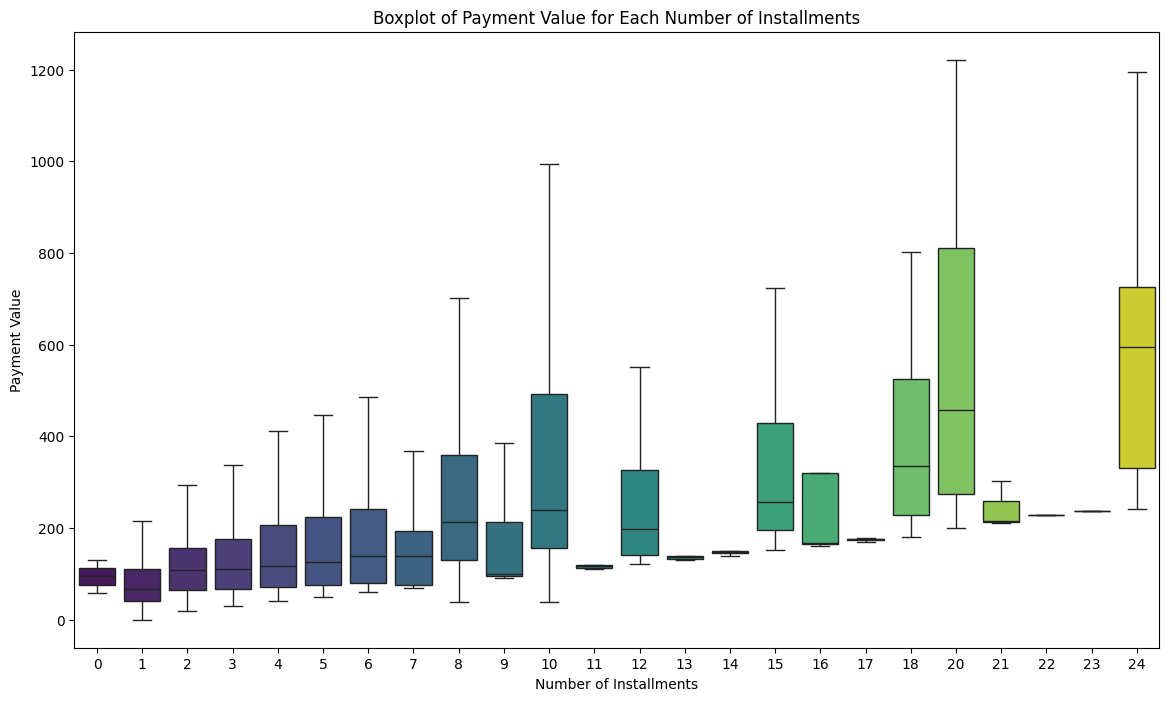

In [81]:
# Create a boxplot for each number of installments
plt.figure(figsize=(14, 8))
sns.boxplot(x='payment_installments', y='payment_value', data=df_1_credit_card, showfliers=False, palette='viridis')
plt.title('Boxplot of Payment Value for Each Number of Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Payment Value')
plt.show()


In [82]:

# Group by 'payment_installments' and calculate mean and std
grouped_data = df_1_credit_card.groupby('payment_installments')['payment_value'].agg(['mean', 'std']).reset_index()

# Print the resulting DataFrame
print("Average and Standard Deviation for Each Number of Installments:\n", grouped_data)


Average and Standard Deviation for Each Number of Installments:
     payment_installments        mean         std
0                      0   94.315000   50.381358
1                      1   95.872930  146.015646
2                      2  127.228150  112.152160
3                      3  142.539317  132.786159
4                      4  163.976840  172.063538
5                      5  183.465222  208.763354
6                      6  209.849952  220.513228
7                      7  187.673672  201.988654
8                      8  307.737427  330.234401
9                      9  203.440870  199.236704
10                    10  415.085837  451.851893
11                    11  124.932174   22.742041
12                    12  321.678496  306.569921
13                    13  150.462500   38.814007
14                    14  167.962667   70.583457
15                    15  445.553108  449.540186
16                    16  292.694000  211.546161
17                    17  174.602500    2.650476
18  

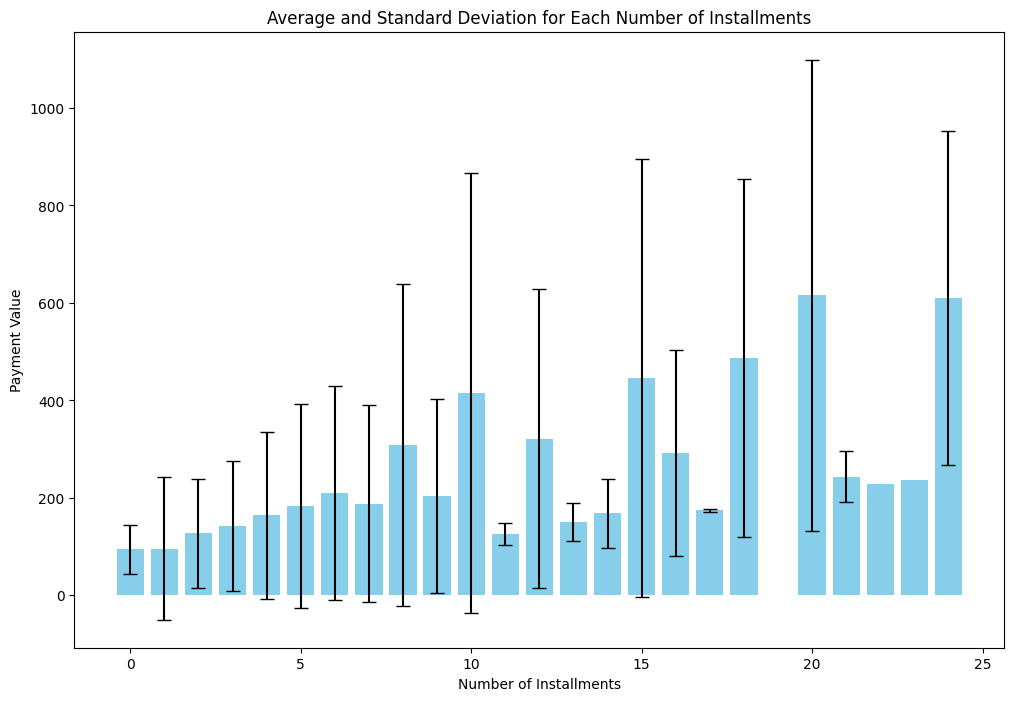

In [83]:
# Assuming grouped_data is your DataFrame with mean and std values
# If not, make sure to use your appropriate DataFrame

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(grouped_data['payment_installments'], grouped_data['mean'], yerr=grouped_data['std'], capsize=5, color='skyblue')
plt.title('Average and Standard Deviation for Each Number of Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Payment Value')
plt.show()


### Pertanyaan 2:

In [85]:
# Convert timestamp columns to datetime format
timestamp_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in timestamp_columns:
    df_2_delivered_final[col] = pd.to_datetime(df_2_delivered_final[col], format='%Y-%m-%d %H:%M:%S')

# Calculate the actual delivery time
df_2_delivered_final['actual_delivery_time'] = (df_2_delivered_final['order_delivered_customer_date'] - df_2_delivered_final['order_purchase_timestamp']).dt.days

# Calculate the estimated delivery time
df_2_delivered_final['estimated_delivery_time'] = (df_2_delivered_final['order_estimated_delivery_date'] - df_2_delivered_final['order_purchase_timestamp']).dt.days

# Calculate the difference between actual and estimated delivery time
df_2_delivered_final['delivery_time_difference'] = (df_2_delivered_final['order_delivered_customer_date'] - df_2_delivered_final['order_estimated_delivery_date']).dt.days

In [86]:
# Group by estimated delivery time and calculate mean
average_actual_delivery_time = df_2_delivered_final.groupby('estimated_delivery_time')['actual_delivery_time'].mean()

# Print the resulting Series
average_actual_delivery_time_df = average_actual_delivery_time.reset_index()
print("Average Actual Delivery Time for Each Estimated Delivery Time (in DataFrame):\n", average_actual_delivery_time_df)

Average Actual Delivery Time for Each Estimated Delivery Time (in DataFrame):
     estimated_delivery_time  actual_delivery_time
0                         2              2.884817
1                         3              3.148936
2                         4              3.935780
3                         5              4.159322
4                         6              4.522876
..                      ...                   ...
95                      116              7.000000
96                      140             16.000000
97                      146              6.000000
98                      149              3.000000
99                      155             20.000000

[100 rows x 2 columns]


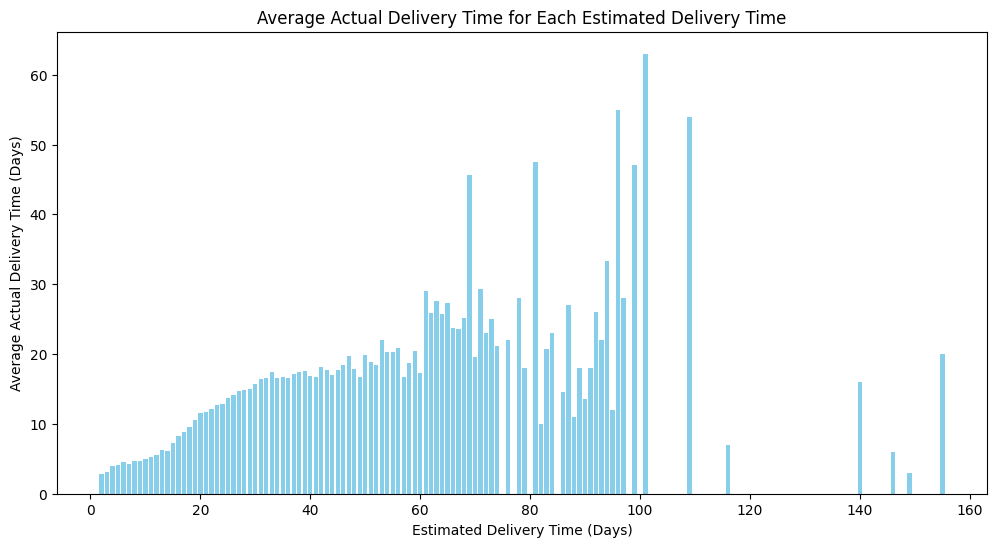

In [87]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(average_actual_delivery_time_df['estimated_delivery_time'], average_actual_delivery_time_df['actual_delivery_time'], color='skyblue')
plt.xlabel('Estimated Delivery Time (Days)')
plt.ylabel('Average Actual Delivery Time (Days)')
plt.title('Average Actual Delivery Time for Each Estimated Delivery Time')
plt.show()


In [88]:
# Group by estimated delivery time and calculate mean difference
average_difference = df_2_delivered_final.groupby('estimated_delivery_time')['delivery_time_difference'].mean()

average_difference_df = average_difference.reset_index()
print("Average Difference between Actual and Estimated Delivery Time for Each Estimated Delivery Time (in DataFrame):\n", average_difference_df.head(70))

Average Difference between Actual and Estimated Delivery Time for Each Estimated Delivery Time (in DataFrame):
     estimated_delivery_time  delivery_time_difference
0                         2                  0.235602
1                         3                 -0.475177
2                         4                 -0.718654
3                         5                 -1.538983
4                         6                 -2.117647
..                      ...                       ...
65                       67                -43.900000
66                       68                -43.444444
67                       69                -24.000000
68                       70                -51.000000
69                       71                -41.888889

[70 rows x 2 columns]


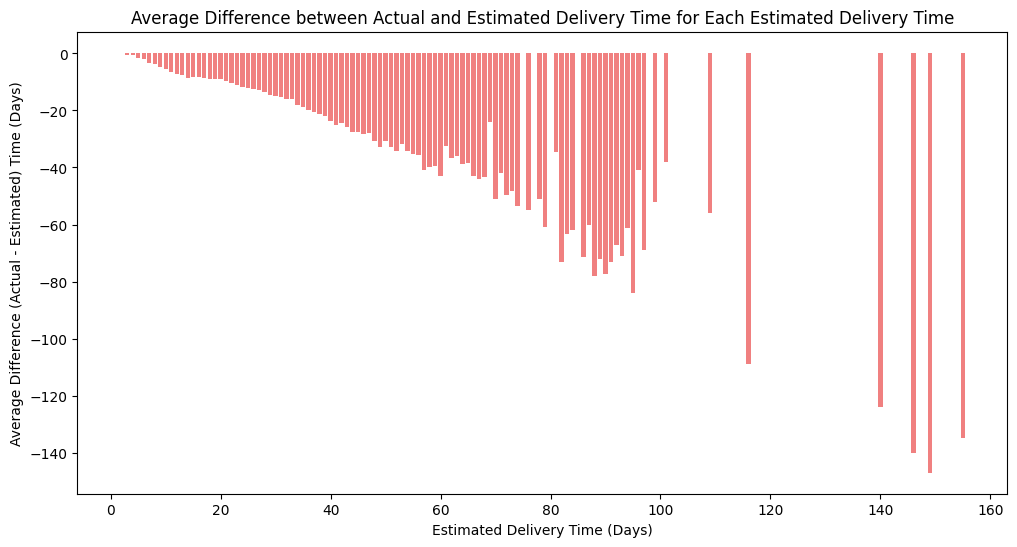

In [89]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(average_difference_df['estimated_delivery_time'], average_difference_df['delivery_time_difference'], color='lightcoral')
plt.xlabel('Estimated Delivery Time (Days)')
plt.ylabel('Average Difference (Actual - Estimated) Time (Days)')
plt.title('Average Difference between Actual and Estimated Delivery Time for Each Estimated Delivery Time')
plt.show()


## Conclusion

- Walau terdapat tren kenaikan jumlah uang yang dibayar dengan jumlah cicilan yang dilakukan, kenaikan bersifat fluktuatif sehingga disimpulkan tidak ada korelasi antaran 2 variabel tersebut
- Semakin lama waktu pengiriman produk, jarak antara estimasi waktu yang dibutuhkan dengan waktu asli yang dibutuhkan semakin meningkat, maka perlu dilakukan pengalibrasian estimasi waktu agar tidak terlalu jauh dari waktu asli yang diperlukan.